# **2. Data Cleaning**

### Objectives

* Clean the raw dataset imported from Kaggle

### Inputs

* Identify missing data, duplicated data, erroneously formatted data

### Outputs

* Create outputs/datasets/collection/HousePrices_clean
* Create outputs/datasets/collection/InheritedHouses_clean 


---

## Change working directory

In [1]:
import os

# Get the current directory
current_dir = os.getcwd()
print("Current Directory:", current_dir)

# Change the directory to the new path
os.chdir('/workspace/milestone-project-housing-issues')

# Get the updated current directory
current_dir = os.getcwd()
print("New Current Directory:", current_dir)

Current Directory: /workspace/milestone-project-housing-issues/jupyter_notebooks
New Current Directory: /workspace/milestone-project-housing-issues


### Loading Data and Raw Data Profile

In [2]:
# Load House Prices dataset
import pandas as pd
df_houseprices_for_cleaning = (pd.read_csv("/workspace/milestone-project-housing-issues/outputs/datasets/collection/HousePrices.csv"))
df_houseprices_for_cleaning.head(3)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
0        150            0.0         548          RFn  ...         65.0   
1        284            NaN         460          RFn  ...         80.0   
2        434            0.0         608          RFn  ...         68.0   

   MasVnrArea OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  WoodDeckSF  \
0       196.0          61            5            7          856         0.0   
1         0.0           0            8            6         1262         NaN   
2       162.0          42            5            7          920         NaN   

   YearBuilt  YearRemodAdd  SalePrice  
0       2003          2003     208500  
1       1976          1976     181500  
2       2001          2002     223500  

[3 rows x 24 columns]

# Raw Data Exploration

In [3]:
# Raw data profile
from ydata_profiling import ProfileReport

pandas_report = ProfileReport(df_houseprices_for_cleaning, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Variables with Zero-Values and Missing Data

### Overview of missing data and variables with non-valid zero-values

#### Overview of Missing data

In [4]:
#Using EvaluateMissingData() function to display missing data
def EvaluateMissingData(df_houseprices_for_cleaning):
  missing_data_absolute = df_houseprices_for_cleaning.isnull().sum()
  missing_data_percentage = round(missing_data_absolute/len(df_houseprices_for_cleaning)*100, 2)
  df_missing_data = (pd.DataFrame(
              data={"RowsWithMissingData": missing_data_absolute,
                  "PercentageOfDataset": missing_data_percentage,
                  "DataType": df_houseprices_for_cleaning.dtypes}
                  )
             .sort_values(by=['PercentageOfDataset'], ascending=False)
             .query("PercentageOfDataset > 0")
             )

  return df_missing_data

EvaluateMissingData(df_houseprices_for_cleaning)


RowsWithMissingData  PercentageOfDataset DataType
EnclosedPorch                 1324                90.68  float64
WoodDeckSF                    1305                89.38  float64
LotFrontage                    259                17.74  float64
GarageFinish                   162                11.10   object
BsmtFinType1                   114                 7.81   object
BedroomAbvGr                    99                 6.78  float64
2ndFlrSF                        86                 5.89  float64
GarageYrBlt                     81                 5.55  float64
MasVnrArea                       8                 0.55  float64

In [5]:
# Dropping variables with more than 80% missing data -EnclosedPorch and WoodDeckSF

from feature_engine.selection import DropFeatures

variables_method = ['EnclosedPorch', 'WoodDeckSF']
imputer = DropFeatures(features_to_drop = variables_method)
imputer.fit(df_houseprices_for_cleaning)
df_houseprices_for_cleaning = imputer.transform(df_houseprices_for_cleaning)
df_houseprices_for_cleaning.head(3)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0        150         548          RFn       2003.0  ...     8450        65.0   
1        284         460          RFn       1976.0  ...     9600        80.0   
2        434         608          RFn       2001.0  ...    11250        68.0   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0       196.0           61            5            7          856       2003   
1         0.0            0            8            6         1262       1976   
2       162.0           42            5            7          920       2001   

   YearRemodAdd  SalePrice  
0          2003     208500  
1          1976     181500  
2          2002     223500  

[3 rows x 22 columns]

#### Overview of variables with zero-values

Addressing numerical variables with excessive/ invalid 0-values before addressing missing data as decisions about how to deal with missing data may follow from decisions about how to deal with 0-values. 

In [6]:
def EvaluateZeroValues(df_houseprices_for_cleaning):
    zero_data_absolute = (df_houseprices_for_cleaning == 0).sum()
    zero_data_percentage = round(zero_data_absolute / len(df_houseprices_for_cleaning) * 100, 2)
    df_zero_data = (pd.DataFrame(
                  data={"RowsWithZeroValues": zero_data_absolute,
                        "PercentageOfDataset": zero_data_percentage,
                        "DataType": df_houseprices_for_cleaning.dtypes}
                  )
                 .sort_values(by=['PercentageOfDataset'], ascending=False)
                 .query("PercentageOfDataset > 0")
                 )

    return df_zero_data

EvaluateZeroValues(df_houseprices_for_cleaning)

RowsWithZeroValues  PercentageOfDataset DataType
MasVnrArea                   861                58.97  float64
2ndFlrSF                     781                53.49  float64
OpenPorchSF                  656                44.93    int64
BsmtFinSF1                   467                31.99    int64
BsmtUnfSF                    118                 8.08    int64
GarageArea                    81                 5.55    int64
TotalBsmtSF                   37                 2.53    int64
BedroomAbvGr                   6                 0.41  float64

As dropping rows with 0-values would significantly affect the size of the available dataset, these variables will be recoded randomly in accordance with the overall distribution of non-0 data.

In [7]:
import numpy as np

columns_to_impute = ['MasVnrArea', '2ndFlrSF', 'OpenPorchSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'TotalBsmtSF']

# Apply random sampling from the distribution for each specified column
for col in columns_to_impute:
    df_houseprices_for_cleaning[col] = df_houseprices_for_cleaning[col].apply(
        lambda x: np.random.choice(df_houseprices_for_cleaning[col][df_houseprices_for_cleaning[col] != 0]) if x == 0 else x
    )

Similarly, the feature YearRemodAdd will be redistributed by applying random sampling from the distribution as there is a disproportionate number of houses showing as modified in 1950, indicating that houses with modifications pre-1950 are coded as 1950. 

In [8]:
# Apply random sampling from the distribution for each specified column

df_houseprices_for_cleaning['YearRemodAdd'] = df_houseprices_for_cleaning['YearRemodAdd'].apply(
    lambda x: np.random.choice(df_houseprices_for_cleaning['YearRemodAdd'][df_houseprices_for_cleaning['YearRemodAdd'] != 1950]) if x == 1950 else x
)

In [9]:
# Re-examining features with zero-values

def EvaluateZeroValues(df_houseprices_for_cleaning):
    zero_data_absolute = (df_houseprices_for_cleaning == 0).sum()
    zero_data_percentage = round(zero_data_absolute / len(df_houseprices_for_cleaning) * 100, 2)
    df_zero_data = (pd.DataFrame(
                  data={"RowsWithZeroValues": zero_data_absolute,
                        "PercentageOfDataset": zero_data_percentage,
                        "DataType": df_houseprices_for_cleaning.dtypes}
                  )
                 .sort_values(by=['PercentageOfDataset'], ascending=False)
                 .query("PercentageOfDataset > 0")
                 )

    return df_zero_data

EvaluateZeroValues(df_houseprices_for_cleaning)

RowsWithZeroValues  PercentageOfDataset DataType
BedroomAbvGr                   6                 0.41  float64

As zero is a valid entry for BedroomAbvGr, this will be left as is.

### Addressing missing data

In [10]:
#Using EvaluateMissingData() function to display missing data
def EvaluateMissingData(df_houseprices_for_cleaning):
  missing_data_absolute = df_houseprices_for_cleaning.isnull().sum()
  missing_data_percentage = round(missing_data_absolute/len(df_houseprices_for_cleaning)*100, 2)
  df_missing_data = (pd.DataFrame(
              data={"RowsWithMissingData": missing_data_absolute,
                  "PercentageOfDataset": missing_data_percentage,
                  "DataType": df_houseprices_for_cleaning.dtypes}
                  )
             .sort_values(by=['PercentageOfDataset'], ascending=False)
             .query("PercentageOfDataset > 0")
             )

  return df_missing_data

EvaluateMissingData(df_houseprices_for_cleaning)

RowsWithMissingData  PercentageOfDataset DataType
LotFrontage                   259                17.74  float64
2ndFlrSF                      182                12.47  float64
GarageFinish                  162                11.10   object
BsmtFinType1                  114                 7.81   object
BedroomAbvGr                   99                 6.78  float64
GarageYrBlt                    81                 5.55  float64
MasVnrArea                     19                 1.30  float64

In [11]:
# Apply random sampling from the distribution for LotFrontage, BedroomAbvGr, BsmtFinType1

columns_to_impute = ['LotFrontage', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinType1', 'GarageFinish', 'MasVnrArea']

# Apply random sampling from the distribution for each specified column
for col in columns_to_impute:
    df_houseprices_for_cleaning[col] = df_houseprices_for_cleaning[col].apply(
        lambda x: np.random.choice(df_houseprices_for_cleaning[col].dropna()) if pd.isnull(x) else x
    )

In [12]:
# Replace missing values for GarageYrBlt with value from YearBuilt
df_houseprices_for_cleaning['GarageYrBlt'].fillna(df_houseprices_for_cleaning['YearBuilt'], inplace=True)


In [13]:
# Apply random imputation based on probability distribution for binary variable 
# import numpy as np

# Calculate probability of `1` in the binary variable
# prob_1 = df_houseprices_for_cleaning['HasFinBsmt'].mean()

# # Impute missing values randomly based on the probability distribution
# df_houseprices_for_cleaning['HasFinBsmt'] = df_houseprices_for_cleaning['HasFinBsmt'].apply(
#     lambda x: np.random.choice([0, 1], p=[1 - prob_1, prob_1]) if pd.isna(x) else x
# )

In [14]:
missing_values_count = df_houseprices_for_cleaning.isna().sum()
missing_values_count

1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinType1    0
BsmtUnfSF       0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64

In [15]:
df_houseprices_for_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1460 non-null   int64  
 1   2ndFlrSF      1460 non-null   float64
 2   BedroomAbvGr  1460 non-null   float64
 3   BsmtExposure  1460 non-null   object 
 4   BsmtFinSF1    1460 non-null   int64  
 5   BsmtFinType1  1460 non-null   object 
 6   BsmtUnfSF     1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   GarageFinish  1460 non-null   object 
 9   GarageYrBlt   1460 non-null   float64
 10  GrLivArea     1460 non-null   int64  
 11  KitchenQual   1460 non-null   object 
 12  LotArea       1460 non-null   int64  
 13  LotFrontage   1460 non-null   float64
 14  MasVnrArea    1460 non-null   float64
 15  OpenPorchSF   1460 non-null   int64  
 16  OverallCond   1460 non-null   int64  
 17  OverallQual   1460 non-null   int64  
 18  TotalBsmtSF   1460 non-null 

In [16]:
# Recoding float64 variables to integers for more rounded analysis of impact of recoding missing data

float_columns = df_houseprices_for_cleaning.select_dtypes(include='float64').columns
df_houseprices_for_cleaning[float_columns] = df_houseprices_for_cleaning[float_columns].astype(int)

df_houseprices_for_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   1stFlrSF      1460 non-null   int64 
 1   2ndFlrSF      1460 non-null   int64 
 2   BedroomAbvGr  1460 non-null   int64 
 3   BsmtExposure  1460 non-null   object
 4   BsmtFinSF1    1460 non-null   int64 
 5   BsmtFinType1  1460 non-null   object
 6   BsmtUnfSF     1460 non-null   int64 
 7   GarageArea    1460 non-null   int64 
 8   GarageFinish  1460 non-null   object
 9   GarageYrBlt   1460 non-null   int64 
 10  GrLivArea     1460 non-null   int64 
 11  KitchenQual   1460 non-null   object
 12  LotArea       1460 non-null   int64 
 13  LotFrontage   1460 non-null   int64 
 14  MasVnrArea    1460 non-null   int64 
 15  OpenPorchSF   1460 non-null   int64 
 16  OverallCond   1460 non-null   int64 
 17  OverallQual   1460 non-null   int64 
 18  TotalBsmtSF   1460 non-null   int64 
 19  YearBu

### Exploring impact of removing missing data

In [17]:
# Loading original dataset for comparison with cleaned dataset
import pandas as pd
df_houseprices = (pd.read_csv("outputs/datasets/collection/HousePrices.csv"))
df_houseprices.head(3)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
0        150            0.0         548          RFn  ...         65.0   
1        284            NaN         460          RFn  ...         80.0   
2        434            0.0         608          RFn  ...         68.0   

   MasVnrArea OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  WoodDeckSF  \
0       196.0          61            5            7          856         0.0   
1         0.0           0            8            6         1262         NaN   
2       162.0          42            5            7          920         NaN   

   YearBuilt  YearRemodAdd  SalePrice  
0       2003          2003     208500  
1       1976          1976     181500  
2       2001          2002     223500  

[3 rows x 24 columns]

In [18]:
#Using DataCleaningEffect() function to examine impact of missing data on variables and dataset
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

df_houseprices_original = df_houseprices.copy()
df_houseprices_cleaned = df_houseprices_for_cleaning.copy()

def DataCleaningEffect(df_houseprices_original,df_houseprices_for_cleaninged,variables_applied_with_method):

  flag_count=1 # Indicate plot number
  
  # distinguish between numerical and categorical variables
  categorical_variables = df_houseprices_original.select_dtypes(exclude=['number']).columns

  # scan over variables, 
    # first on variables that you applied the method
    # if the variable is a numerical plot, a histogram if categorical plot a barplot
  for set_of_variables in [variables_applied_with_method]:
    print("\n=====================================================================================")
    print(f"* Distribution Effect Analysis After Data Cleaning Method in the following variables:")
    print(f"{set_of_variables} \n\n")
  

    for var in set_of_variables:
      if var in categorical_variables:  # it is categorical variable: barplot
        
        df1 = pd.DataFrame({"Type":"Original","Value":df_houseprices_original[var]})
        df2 = pd.DataFrame({"Type":"Cleaned","Value":df_houseprices_cleaned[var]})
        dfAux = pd.concat([df1, df2], axis=0)
        fig , axes = plt.subplots(figsize=(15, 5))
        sns.countplot(hue='Type', data=dfAux, x="Value",palette=['#432371',"#FAAE7B"])
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.xticks(rotation=90)
        plt.legend() 

      else: # it is numerical variable: histogram

        fig , axes = plt.subplots(figsize=(10, 5))
        sns.histplot(data=df_houseprices_original, x=var, color="#432371", label='Original', kde=True,element="step", ax=axes)
        sns.histplot(data=df_houseprices_cleaned, x=var, color="#FAAE7B", label='Cleaned', kde=True,element="step", ax=axes)
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.legend() 

      plt.show()
      flag_count+= 1



* Distribution Effect Analysis After Data Cleaning Method in the following variables:
      LotFrontage  2ndFlrSF  BedroomAbvGr BsmtFinType1 GarageFinish  \
0              65       854             3          GLQ          RFn   
1              80       756             3          ALQ          RFn   
2              68       866             3          GLQ          RFn   
3              60      1040             2          ALQ          Unf   
4              84       714             4          GLQ          RFn   
...           ...       ...           ...          ...          ...   
1455           62       694             3          Unf          RFn   
1456           85       432             3          ALQ          Unf   
1457           66      1152             4          GLQ          RFn   
1458           68       454             2         None          Unf   
1459           75      1152             3          BLQ          Fin   

      MasVnrArea  GarageYrBlt  
0            196         200

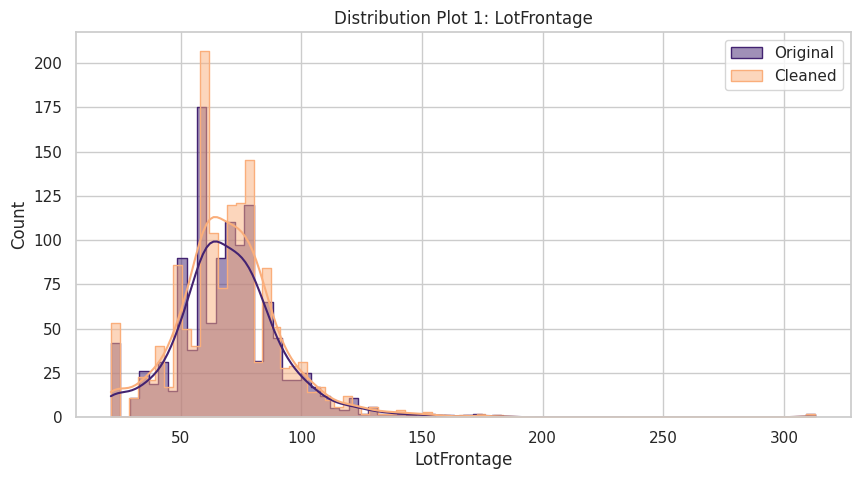

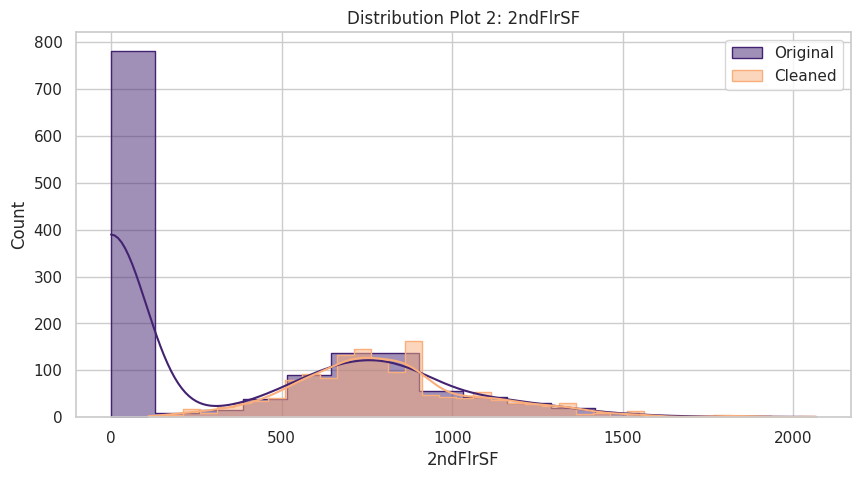

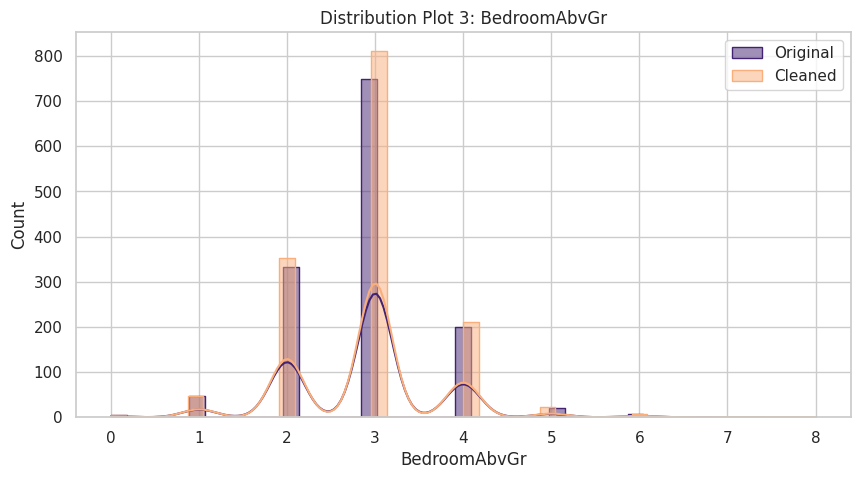

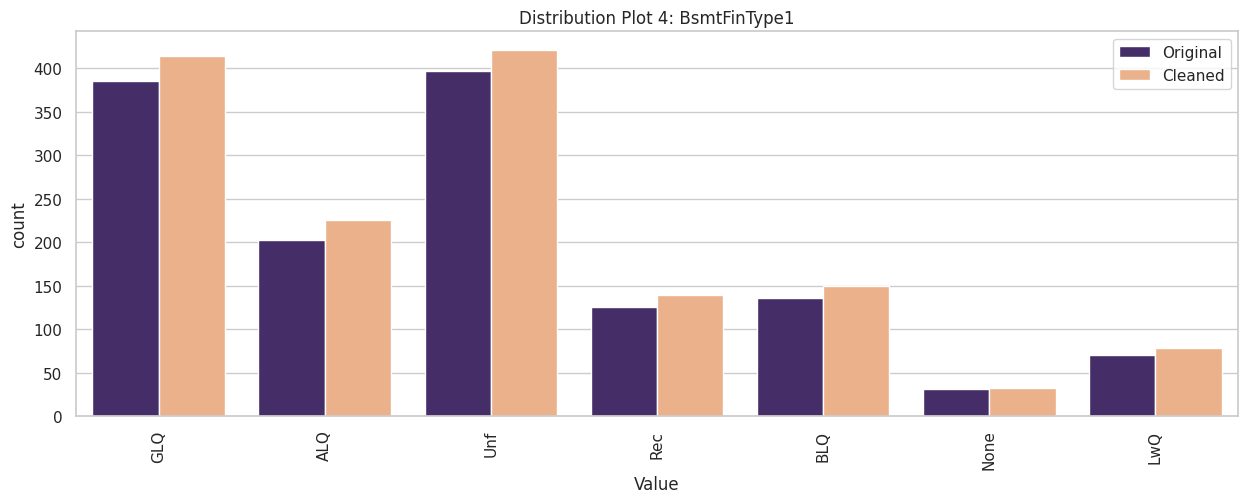

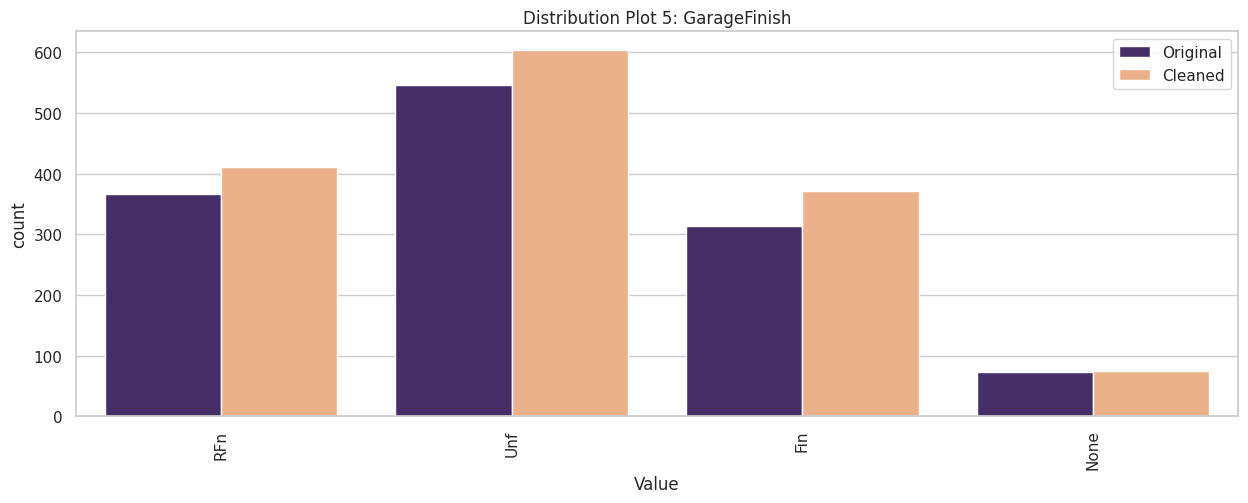

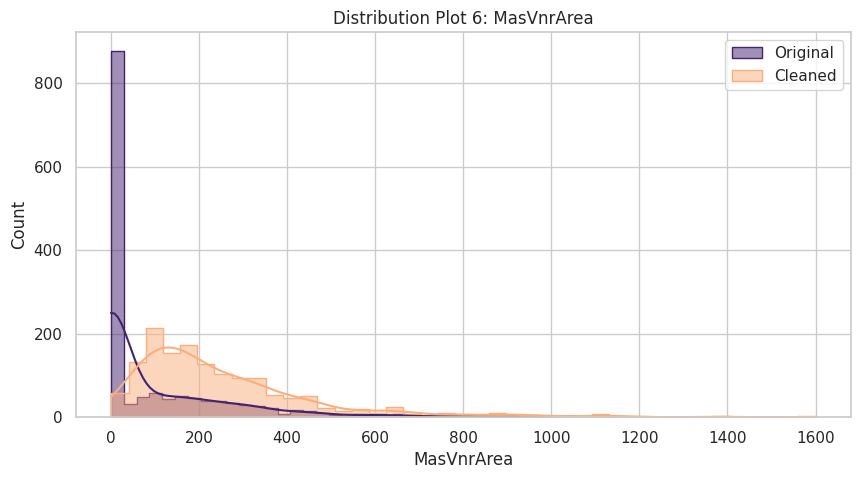

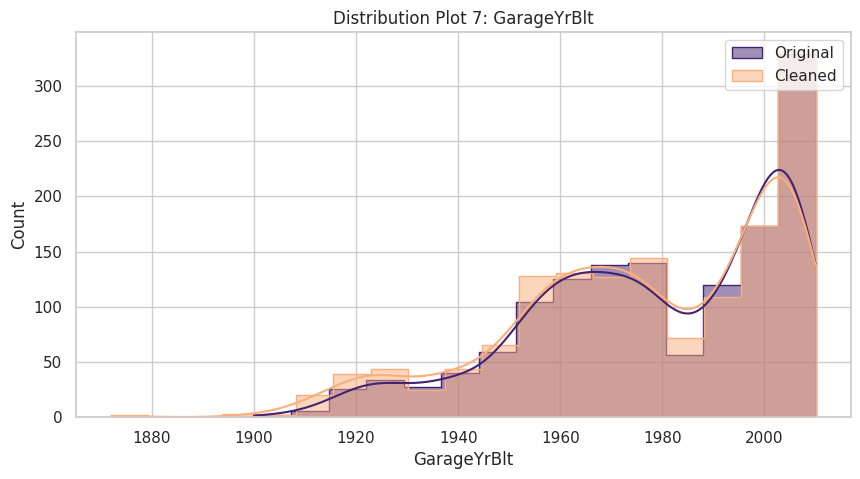

In [19]:
DataCleaningEffect(df_houseprices_original,
df_houseprices_cleaned,
variables_applied_with_method = df_houseprices_for_cleaning[['LotFrontage', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinType1', 'GarageFinish', 'MasVnrArea', 'GarageYrBlt']])

No significant impacts to the distributions where 0-values and missing data have been recoded are observed for any of the recoded features.

In [20]:
df_houseprices_cleaned.head()


1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856       854             3           No         706          GLQ   
1      1262       756             3           Gd         978          ALQ   
2       920       866             3           Mn         486          GLQ   
3       961      1040             2           No         216          ALQ   
4      1145       714             4           Av         655          GLQ   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0        150         548          RFn         2003  ...     8450          65   
1        284         460          RFn         1976  ...     9600          80   
2        434         608          RFn         2001  ...    11250          68   
3        540         642          Unf         1998  ...     9550          60   
4        490         836          RFn         2000  ...    14260          84   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0         196           61            5            7          856       2003   
1         554           56            8            6         1262       1976   
2         162           42            5            7          920       2001   
3         154           35            5            7          756       1915   
4         350           84            5            8         1145       2000   

   YearRemodAdd  SalePrice  
0          2003     208500  
1          1976     181500  
2          2002     223500  
3          1970     140000  
4          2000     250000  

[5 rows x 22 columns]

In [21]:
# Data Exploration of final dataset

from ydata_profiling import ProfileReport

# Generate the profile report using the modified DataFrame with missing data recoded, zeroes addressed, and categorical data turned into numerical
pandas_report = ProfileReport(df_houseprices_cleaned, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Save as new working dataset in Collections folder

In [22]:
# Save as file in collections folder

import os
try:
  os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
  print(e)


[Errno 17] File exists: 'outputs/datasets/cleaned'


In [23]:
df_houseprices_cleaned.to_csv("outputs/datasets/cleaned/HousePricesClean.csv", index=False)

---

# Conclusions and Next Steps